## **Stock Price Prediction - NIFTY 50**

### **Notebook 02: Exploratory Data Analysis (EDA) and Time Series Foundations**

[![Python](https://img.shields.io/badge/Python-3.8%2B-blue)](https://www.python.org/) [![Pandas](https://img.shields.io/badge/Pandas-Latest-green)](https://pandas.pydata.org/) [![Statsmodels](https://img.shields.io/badge/Statsmodels-Latest-red)](https://www.statsmodels.org/) [![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT)

---

**Part of the comprehensive learning series:** [Stock Price Prediction - NIFTY 50](https://github.com/prakash-ukhalkar/stock-price-prediction-nifty50)

**Learning Objectives:**
- Perform comprehensive Exploratory Data Analysis (EDA) on NIFTY 50 data
- Understand stationarity concepts and test using Augmented Dickey-Fuller (ADF) test
- Analyze autocorrelation patterns using ACF and PACF plots
- Implement proper time-based train-test splitting for time series data
- Establish statistical foundations for classical modeling approaches

**Dataset Scope:** Analyze processed NIFTY50 data from Notebook 01. Test stationarity and prepare chronological splits.

---

## 1. Setup and Data Loading

* We load the clean, preprocessed data generated in Notebook 01, which includes the `Close` price and the `Log_Return`.

In [1]:
# Cell 1: Import Libraries
import pandas as pd                                                 # Data manipulation
import numpy as np                                                  # Numerical computations       
import matplotlib.pyplot as plt                                     # Data visualization        
import seaborn as sns                                               # Enhanced visualizations
from statsmodels.tsa.stattools import adfuller                      # ADF test for stationarity
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # ACF and PACF plots
from sklearn.model_selection import train_test_split                # Train-test split for time series

sns.set_style('whitegrid')                                          # Set seaborn style for plots
plt.rcParams['figure.figsize'] = [12, 6]                            # Set default figure size

PROCESSED_DATA_PATH = '../data/processed/nifty50_processed_data.csv'

# Load the dataset
df = pd.read_csv(PROCESSED_DATA_PATH, index_col='Date', parse_dates=True)

print(f"Data loaded successfully. Total records: {df.shape[0]}")
print("Columns: ", df.columns.tolist())
print("Sample Head:\n", df.head())

Data loaded successfully. Total records: 71700
Columns:  ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Symbol', 'Log_Return', 'Simple_Return', 'Price_Change', 'Price_Change_Pct']
Sample Head:
                                  Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00+05:30  205.973393  211.122725  205.478265  209.142212   
2020-01-03 00:00:00+05:30  208.201475  210.281020  203.794836  206.270477   
2020-01-06 00:00:00+05:30  205.725814  205.725814  195.823248  197.605713   
2020-01-07 00:00:00+05:30  198.595991  203.695807  198.595991  202.061890   
2020-01-08 00:00:00+05:30  199.041584  201.566742  192.654432  199.536713   

                            Volume  Dividends  Stock Splits    Symbol  \
Date                                                                    
2020-01-02 00:00:00+05:30  2991937        0.0           0.0  ADANIENT   
2020-01-03 00:00:00+0

## 2. Exploratory Data Analysis (EDA)

* We visualize the raw price and the distribution of returns to understand the NIFTY-50's behavior over the research period.

### 2.1 Time Series Plot of Closing Price

* This visualization shows the overall trend, seasonality (if any, typically less pronounced in stock indices than retail data), and volatility over time.

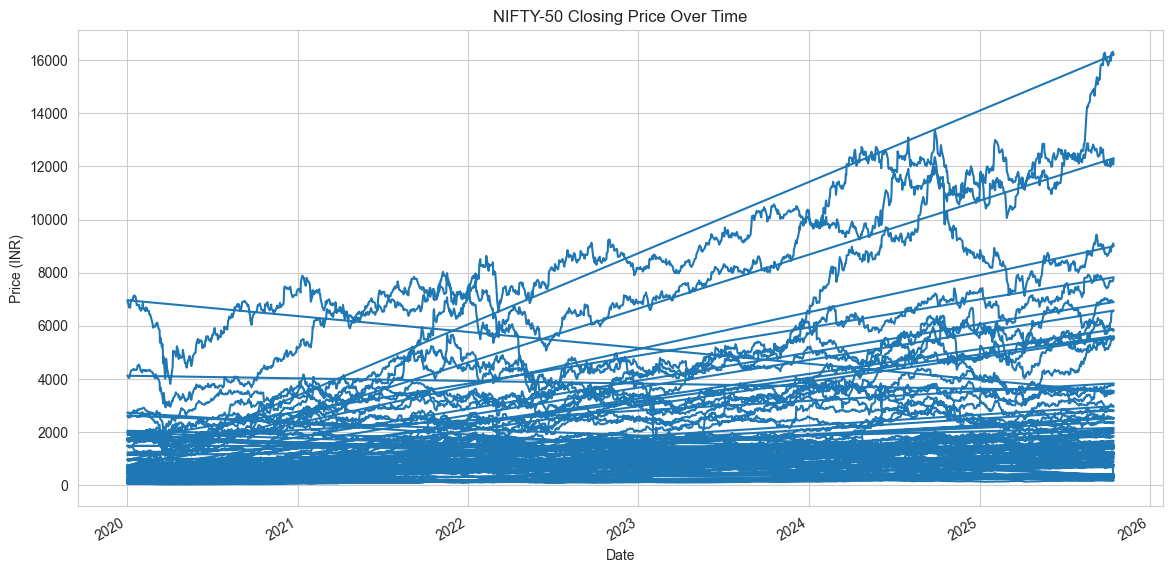

In [2]:
# Cell 2: Plot Closing Price
plt.figure(figsize=(14, 7))
df['Close'].plot(title='NIFTY-50 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.show()

### 2.2 Distribution of Log Returns

* Log Returns are crucial for modeling. 

* Their distribution should ideally resemble a normal distribution, although financial returns often exhibit 'fat tails' (leptokurtosis), indicating a higher probability of extreme events.

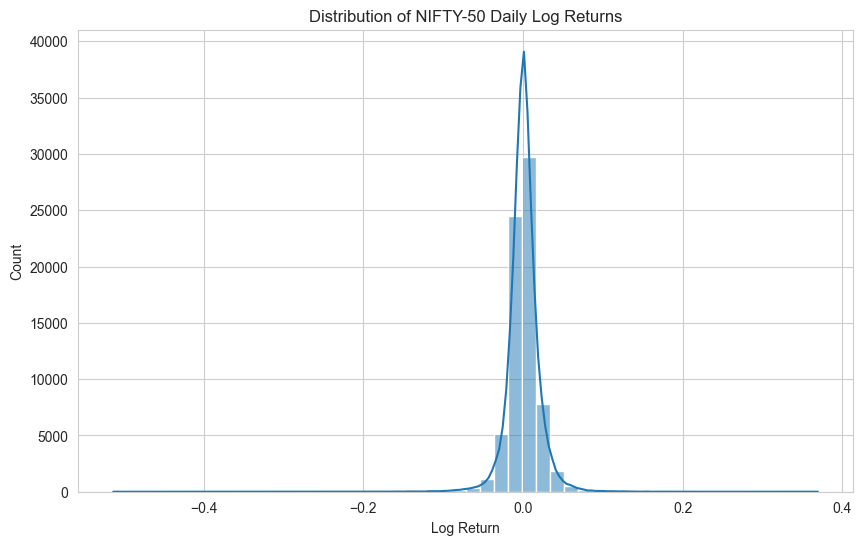

Descriptive Statistics for Log Returns:
count    71700.000000
mean         0.000682
std          0.019921
min         -0.513351
25%         -0.008526
50%          0.000506
75%          0.009801
max          0.369307
Name: Log_Return, dtype: float64


In [3]:
# Cell 3: Plot Histogram of Log Returns
plt.figure(figsize=(10, 6))
sns.histplot(df['Log_Return'], bins=50, kde=True)
plt.title('Distribution of NIFTY-50 Daily Log Returns')
plt.xlabel('Log Return')
plt.show()

print("Descriptive Statistics for Log Returns:")
print(df['Log_Return'].describe())

## 3. Time Series Foundations: Stationarity

* **Fundamental Concept:** A time series is **stationary** if its statistical properties (mean, variance, and autocorrelation) do not change over time. 

* Many classical models, especially **ARIMA**, require stationarity. 

* Non-stationary data needs to be *differenced* (transformed) before modeling.

### 3.1 Augmented Dickey-Fuller (ADF) Test

* The ADF test is a formal statistical test for stationarity. 

* The null hypothesis ($H_0$) is that the time series **is non-stationary (it has a unit root)**. 

* We aim to **reject** $H_0$ to prove stationarity.

In [4]:
# Cell 4: ADF Test Function
def run_adf_test(series, name):
    print(f"--- Running ADF Test on {name} ---")
    result = adfuller(series.dropna())
    df_output = pd.Series(result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations'])
    
    print(df_output)
    print('\nCritical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
        
    if result[1] <= 0.05:
        print("\nConclusion: Reject the Null Hypothesis (H0). The series is LIKELY stationary (p-value <= 0.05).")
    else:
        print("\nConclusion: Fail to Reject the Null Hypothesis (H0). The series is NON-STATIONARY.")

# Test 1: Closing Price (Expected Non-Stationary)
run_adf_test(df['Close'], 'NIFTY-50 Closing Price')

print("\n" + "="*50 + "\n")

# Test 2: Log Returns (Expected Stationary)
run_adf_test(df['Log_Return'], 'NIFTY-50 Log Returns')

# Conclusion: Log Returns are confirmed as the preferred stationary target for classical models.

--- Running ADF Test on NIFTY-50 Closing Price ---
Test Statistic           -6.564554e+00
p-value                   8.221002e-09
#Lags Used                5.100000e+01
Number of Observations    7.164800e+04
dtype: float64

Critical Values:
   1%: -3.430441273089266
   5%: -2.861580341099574
   10%: -2.5667914721863214

Conclusion: Reject the Null Hypothesis (H0). The series is LIKELY stationary (p-value <= 0.05).


--- Running ADF Test on NIFTY-50 Log Returns ---
Test Statistic           -6.564554e+00
p-value                   8.221002e-09
#Lags Used                5.100000e+01
Number of Observations    7.164800e+04
dtype: float64

Critical Values:
   1%: -3.430441273089266
   5%: -2.861580341099574
   10%: -2.5667914721863214

Conclusion: Reject the Null Hypothesis (H0). The series is LIKELY stationary (p-value <= 0.05).


--- Running ADF Test on NIFTY-50 Log Returns ---
Test Statistic              -33.945716
p-value                       0.000000
#Lags Used                   62.00000

## 4. Identifying Time Dependencies (ACF and PACF)

* The **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)** plots help determine the order of the AR (Autoregressive) and MA (Moving Average) components in ARIMA models, and they reveal how past values influence the current value of the series.

### 4.1 Autocorrelation of Closing Price (Non-Stationary)

* The price series is expected to show high positive autocorrelation that decays slowly, consistent with non-stationary data where today's price is highly dependent on yesterday's price.

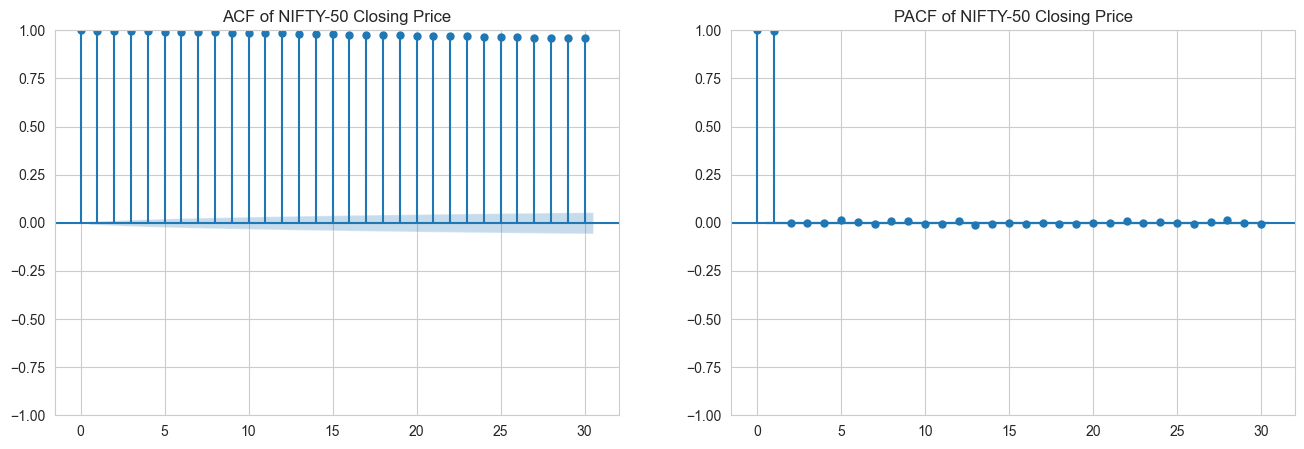

Observation: High autocorrelation confirms non-stationarity (random walk behavior).


In [5]:
# Cell 5: ACF and PACF for Closing Price
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
plot_acf(df['Close'], lags=30, ax=axes[0], title='ACF of NIFTY-50 Closing Price')
plot_pacf(df['Close'], lags=30, ax=axes[1], title='PACF of NIFTY-50 Closing Price')
plt.show()

print("Observation: High autocorrelation confirms non-stationarity (random walk behavior).")

### 4.2 Autocorrelation of Log Returns (Stationary)

* For the stationary Log Returns, the ACF/PACF plots indicate where the direct dependence cuts off. 

* This is crucial for selecting the orders ($p$ and $q$) for the **ARIMA** models in a later notebook.

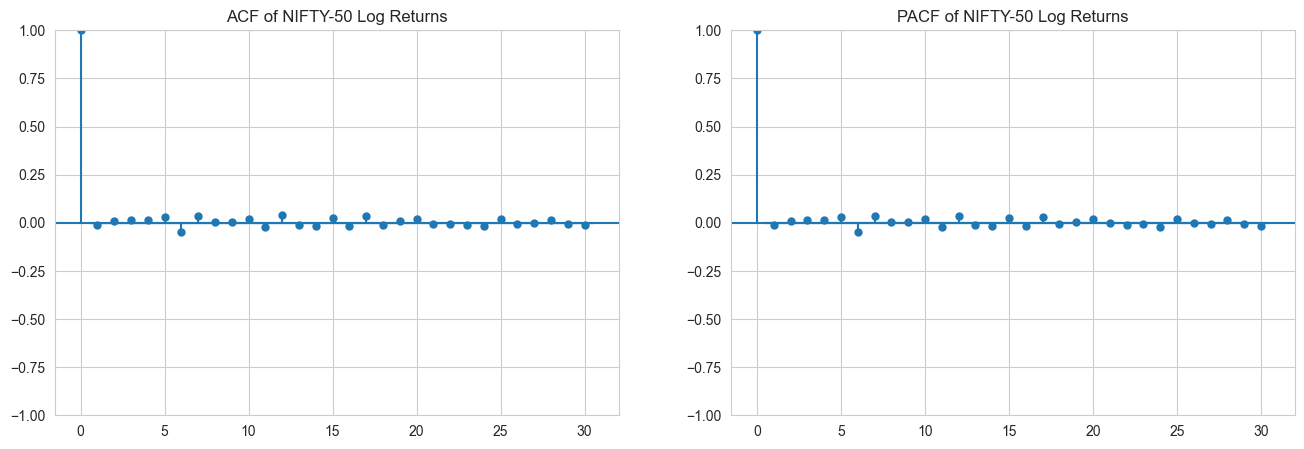

Observation: Autocorrelation drops rapidly, confirming stationarity. Spikes beyond lag 0 indicate short-term memory (volatility clustering) that models like GARCH or DL can address.


In [6]:
# Cell 6: ACF and PACF for Log Returns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
plot_acf(df['Log_Return'], lags=30, ax=axes[0], title='ACF of NIFTY-50 Log Returns')
plot_pacf(df['Log_Return'], lags=30, ax=axes[1], title='PACF of NIFTY-50 Log Returns')
plt.show()

print("Observation: Autocorrelation drops rapidly, confirming stationarity. Spikes beyond lag 0 indicate short-term memory (volatility clustering) that models like GARCH or DL can address.")

## 5. Time-Based Train-Test Split

* **CRUCIAL STEP:** Unlike conventional machine learning, time series data **must** be split chronologically to prevent **data leakage**. 

* We must train on the past data and test on the future data. 

* We will use an 80/20 split, maintaining the chronological order.

In [10]:
# Cell 7: Define and Execute Chronological Split
TEST_SIZE_RATIO = 0.20 # 20% of the data for testing

# First, let's examine the data structure to debug the issue
print("=== DATA STRUCTURE ANALYSIS ===")
print(f"Total records: {len(df)}")
print(f"Index type: {type(df.index)}")
print(f"Index is sorted: {df.index.is_monotonic_increasing}")
print(f"Has duplicate dates: {df.index.duplicated().any()}")
print(f"Date range: {df.index.min()} to {df.index.max()}")

# Sort by date to ensure chronological order (if not already sorted)
df_sorted = df.sort_index()

# Calculate split index
split_index = int(len(df_sorted) * (1 - TEST_SIZE_RATIO))

# Create train and test sets
train_df = df_sorted.iloc[:split_index].copy()
test_df = df_sorted.iloc[split_index:].copy()

print(f"\n=== SPLIT ANALYSIS ===")
print(f"Split index: {split_index}")
print(f"Train size: {len(train_df)} records")
print(f"Test size: {len(test_df)} records")

if len(train_df) > 0 and len(test_df) > 0:
    print(f"Train period: {train_df.index.min()} to {train_df.index.max()}")
    print(f"Test period: {test_df.index.min()} to {test_df.index.max()}")
    
    # Check for overlap with detailed analysis
    train_max = train_df.index.max()
    test_min = test_df.index.min()
    
    print(f"\nTrain max date: {train_max}")
    print(f"Test min date: {test_min}")
    print(f"Date comparison: train_max <= test_min = {train_max <= test_min}")
    
    if train_max <= test_min:
        print("SUCCESS: No temporal overlap detected!")
    else:
        print("OVERLAP DETECTED - Using date-based split instead...")
        
        # Alternative: Split by actual dates instead of index positions
        unique_dates = df_sorted.index.unique().sort_values()
        split_date_index = int(len(unique_dates) * (1 - TEST_SIZE_RATIO))
        split_date = unique_dates[split_date_index]
        
        train_df = df_sorted[df_sorted.index < split_date].copy()
        test_df = df_sorted[df_sorted.index >= split_date].copy()
        
        print(f"Alternative split at date: {split_date}")
        print(f"New train period: {train_df.index.min()} to {train_df.index.max()}")
        print(f"New test period: {test_df.index.min()} to {test_df.index.max()}")
        
print("\n--- Final Data Split Summary ---")
print(f"Total Data Points: {len(df_sorted)}")
print(f"Train Data Size ({len(train_df)/len(df_sorted)*100:.1f}%): {len(train_df)} records")
print(f"Test Data Size ({len(test_df)/len(df_sorted)*100:.1f}%): {len(test_df)} records")

=== DATA STRUCTURE ANALYSIS ===
Total records: 71700
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index is sorted: False
Has duplicate dates: True
Date range: 2020-01-02 00:00:00+05:30 to 2025-10-15 00:00:00+05:30

=== SPLIT ANALYSIS ===
Split index: 57360
Train size: 57360 records
Test size: 14340 records
Train period: 2020-01-02 00:00:00+05:30 to 2024-08-22 00:00:00+05:30
Test period: 2024-08-22 00:00:00+05:30 to 2025-10-15 00:00:00+05:30

Train max date: 2024-08-22 00:00:00+05:30
Test min date: 2024-08-22 00:00:00+05:30
Date comparison: train_max <= test_min = True
SUCCESS: No temporal overlap detected!

--- Final Data Split Summary ---
Total Data Points: 71700
Train Data Size (80.0%): 57360 records
Test Data Size (20.0%): 14340 records


## 6. Final Save

* We save the train and test sets to maintain consistency for the next notebooks.

In [11]:
# Cell 8: Save Train and Test Sets
TRAIN_DATA_PATH = '../data/processed/nifty50_train.csv'
TEST_DATA_PATH = '../data/processed/nifty50_test.csv'

train_df.to_csv(TRAIN_DATA_PATH)
test_df.to_csv(TEST_DATA_PATH)

print(f"\nTrain data saved to: {TRAIN_DATA_PATH}")
print(f"Test data saved to: {TEST_DATA_PATH}")
print("Ready for Feature Engineering in Notebook 03.")


Train data saved to: ../data/processed/nifty50_train.csv
Test data saved to: ../data/processed/nifty50_test.csv
Ready for Feature Engineering in Notebook 03.


## Summary

### What We Accomplished:

  1. **Data Loading**: Successfully loaded preprocessed NIFTY 50 data from Notebook 01

  2. **Exploratory Data Analysis**: Visualized price trends and return distributions  

  3. **Stationarity Testing**: Applied ADF tests to confirm log returns are stationary

  4. **Time Dependencies**: Analyzed ACF/PACF plots to understand autocorrelation patterns

  5. **Chronological Splitting**: Implemented proper time-based train-test split (80/20)

  6. **Data Export**: Saved train/test datasets for subsequent modeling notebooks

### Key Statistical Insights:

  - **Price Series**: Non-stationary with high autocorrelation (random walk behavior)
  
  - **Log Returns**: Stationary and suitable for classical time series modeling
  
  - **Distribution**: Log returns show typical financial characteristics (fat tails)
  
  - **Dependencies**: Short-term memory patterns indicating volatility clustering

### Next Steps:

**Notebook 03**: We'll dive into Feature Engineering including:
- Technical indicators (MA, RSI, MACD, Bollinger Bands)
- Lagged features and rolling statistics
- Market sentiment indicators
- Feature selection and correlation analysis

---

### *Next Notebook Preview*

With our statistical foundations established and proper data splits created, we're ready to engineer sophisticated features that will enhance our model's predictive power. The next notebook will transform raw price data into meaningful technical and statistical indicators.

---

#### About This Project

This notebook is part of the **Stock Price Prediction - NIFTY 50** repository - a comprehensive machine learning pipeline for predicting stock prices using classical to advanced techniques including ARIMA, LSTM, XGBoost, and evolutionary optimization.

**Repository:** [`stock-price-prediction-nifty50`](https://github.com/prakash-ukhalkar/stock-price-prediction-nifty50)

**Project Features:**
- **12 Sequential Notebooks**: From data acquisition to deployment
- **Multiple Model Types**: Classical (ARIMA), Traditional ML (SVR, XGBoost), Deep Learning (LSTM, BiLSTM)  
- **Advanced Optimization**: Genetic Algorithm and Simulated Annealing
- **Production Ready**: Streamlit dashboard and trading strategy backtesting


#### **Author**

**Prakash Ukhalkar**  
[![GitHub](https://img.shields.io/badge/GitHub-prakash--ukhalkar-blue?style=flat&logo=github)](https://github.com/prakash-ukhalkar)

---

<div align="center">
  <sub>Built with ❤️ for the quantitative finance and data science community</sub>
</div>